In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Learning Pytorch!

In [3]:
# Creating a tensor from data
x_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Creating a tensor from numpy array
np_array = np.array([[5.0, 6.0], [7.0, 8.0]])
x_np = torch.from_numpy(np_array)

# Creating tensors with specific dimensions
x_zeros = torch.zeros(2, 3)
x_ones = torch.ones(2, 3)
x_random = torch.rand(2, 3)

print(x_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### Practice maniupations with PyTorch
Using the following matrix, add 2, multiply by 2, and then multiply y against itself. This should feel like Numpy.

In [4]:
# Basic operations
y = torch.tensor([[9.0, 10.0], [11.0, 12.0]])
sum_result = x_data + y
prod_result = x_data * y

# Matrix multiplication
matmul_result = torch.matmul(x_data, y.T)


## A one layer perceptron

Text(0, 0.5, 'y')

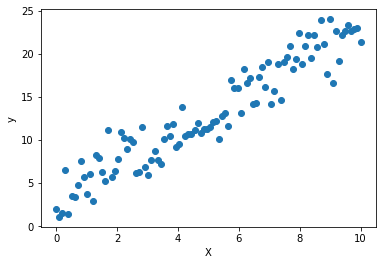

In [5]:
# Generate synthetic data for linear regression
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(100, 1) * 2  # Linear relation with some noise

# Visualize the data
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

In [7]:
# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 5.0923
Epoch [20/100], Loss: 4.9662
Epoch [30/100], Loss: 4.8520
Epoch [40/100], Loss: 4.7486
Epoch [50/100], Loss: 4.6550
Epoch [60/100], Loss: 4.5703
Epoch [70/100], Loss: 4.4936
Epoch [80/100], Loss: 4.4241
Epoch [90/100], Loss: 4.3613
Epoch [100/100], Loss: 4.3044


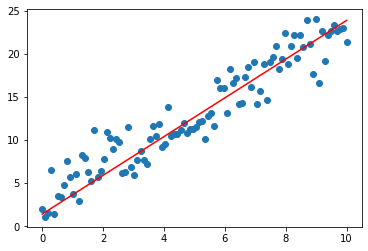

In [9]:
# Plot the model's predictions
predicted = model(X).detach().numpy()  # Detach to convert to numpy
plt.plot(X.numpy(), predicted, color="red", label="Fitted Line")
plt.scatter(X.numpy(), y.numpy())

In [10]:
model.linear.weight.data, model.linear.bias.data

(tensor([[2.2476]]), tensor([1.3743]))

### Using the template code above, generate 3-dimensional synthetic linear regression data
You are encouraged to translate your homework solution from numpy into torch.

In [28]:
# Generate synthetic data for linear regression
X1 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X2 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X3 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X = torch.hstack((X1,X2,X3))
B  = torch.tensor([1,2,3,4])
y = B[0] + (X * B[1:]).sum(axis=1).unsqueeze(1) + torch.randn(100, 1)

Build your own neural net!

In [1]:
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

NameError: name 'nn' is not defined

In [32]:
# Instantiate the model
model_1 = MultiLinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model_1.parameters(), lr=0.01)

In [33]:
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model_1(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/2000], Loss: 696.6940
Epoch [200/2000], Loss: 200.1675
Epoch [300/2000], Loss: 58.1425
Epoch [400/2000], Loss: 17.5159
Epoch [500/2000], Loss: 5.8945
Epoch [600/2000], Loss: 2.5701
Epoch [700/2000], Loss: 1.6192
Epoch [800/2000], Loss: 1.3471
Epoch [900/2000], Loss: 1.2693
Epoch [1000/2000], Loss: 1.2470
Epoch [1100/2000], Loss: 1.2407
Epoch [1200/2000], Loss: 1.2388
Epoch [1300/2000], Loss: 1.2383
Epoch [1400/2000], Loss: 1.2382
Epoch [1500/2000], Loss: 1.2381
Epoch [1600/2000], Loss: 1.2381
Epoch [1700/2000], Loss: 1.2381
Epoch [1800/2000], Loss: 1.2381
Epoch [1900/2000], Loss: 1.2381
Epoch [2000/2000], Loss: 1.2381


## Building a neural net for XOR

Build a neural net for solving the XOR problem. The first line layer is written for you.
Use the training code from above to make one run.

In [3]:
# XOR inputs and labels
X = torch.tensor([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], 
                  [1], 
                  [1], 
                  [0]], dtype=torch.float32)

In [14]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)   # Input layer to hidden layer
        self.fc2 = nn.Linear(8, 1)   # Hidden layer to output layer

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation for hidden layer
        x = self.fc2(x)
        x = torch.sigmoid(x)  # Sigmoid activation for output layer
        return x

# Instantiate the model
model = XORNet()

In [15]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [16]:
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass: compute the output and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()   # Zero out gradients from the previous step
    loss.backward()         # Compute new gradients
    optimizer.step()        # Update parameters

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1000/10000], Loss: 0.0259
Epoch [2000/10000], Loss: 0.0051
Epoch [3000/10000], Loss: 0.0024
Epoch [4000/10000], Loss: 0.0015
Epoch [5000/10000], Loss: 0.0010
Epoch [6000/10000], Loss: 0.0008
Epoch [7000/10000], Loss: 0.0006
Epoch [8000/10000], Loss: 0.0005
Epoch [9000/10000], Loss: 0.0005
Epoch [10000/10000], Loss: 0.0004


In [17]:
model_params = list(model.parameters())
model_params

[Parameter containing:
 tensor([[-0.5935,  1.3319],
         [-0.3793, -0.2659],
         [ 1.1855, -1.5551],
         [ 0.7708, -1.0207],
         [ 0.6722, -0.4027],
         [ 0.1763,  0.0916],
         [ 1.1912,  1.1911],
         [ 3.0970, -3.0970]], requires_grad=True),
 Parameter containing:
 tensor([ 7.3641e-01, -2.7236e-01,  1.5551e+00,  1.0207e+00,  4.0270e-01,
         -4.2774e-01, -1.1911e+00, -5.5156e-05], requires_grad=True),
 Parameter containing:
 tensor([[ 1.5840,  0.0724, -2.3740, -1.4070, -0.8119,  0.2702, -1.9539,  4.3155]],
        requires_grad=True),
 Parameter containing:
 tensor([0.4479], requires_grad=True)]

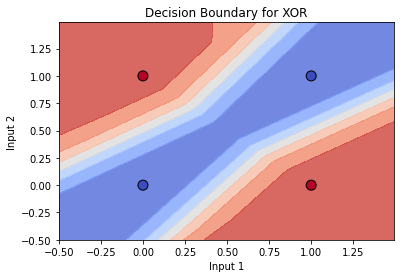

In [18]:
# Plot decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_input = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    grid_pred = model(grid_input)
    grid_pred = grid_pred.reshape(xx.shape).numpy()
plt.contourf(xx, yy, grid_pred, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze().numpy(), edgecolor='k', s=100, cmap='coolwarm')
plt.title("Decision Boundary for XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()